In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.230,9.4,68,5500,31,38,6229.0
147,148,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,...,108,mpfi,3.62,2.640,9.0,94,5200,25,31,10198.0
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,10295.0
179,180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.350,9.3,161,5200,19,24,15998.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [8]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [9]:
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [12]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Observation**
1. There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`
2. So we have to replace those incorrect car company names wit correct company's name.

In [14]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [15]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

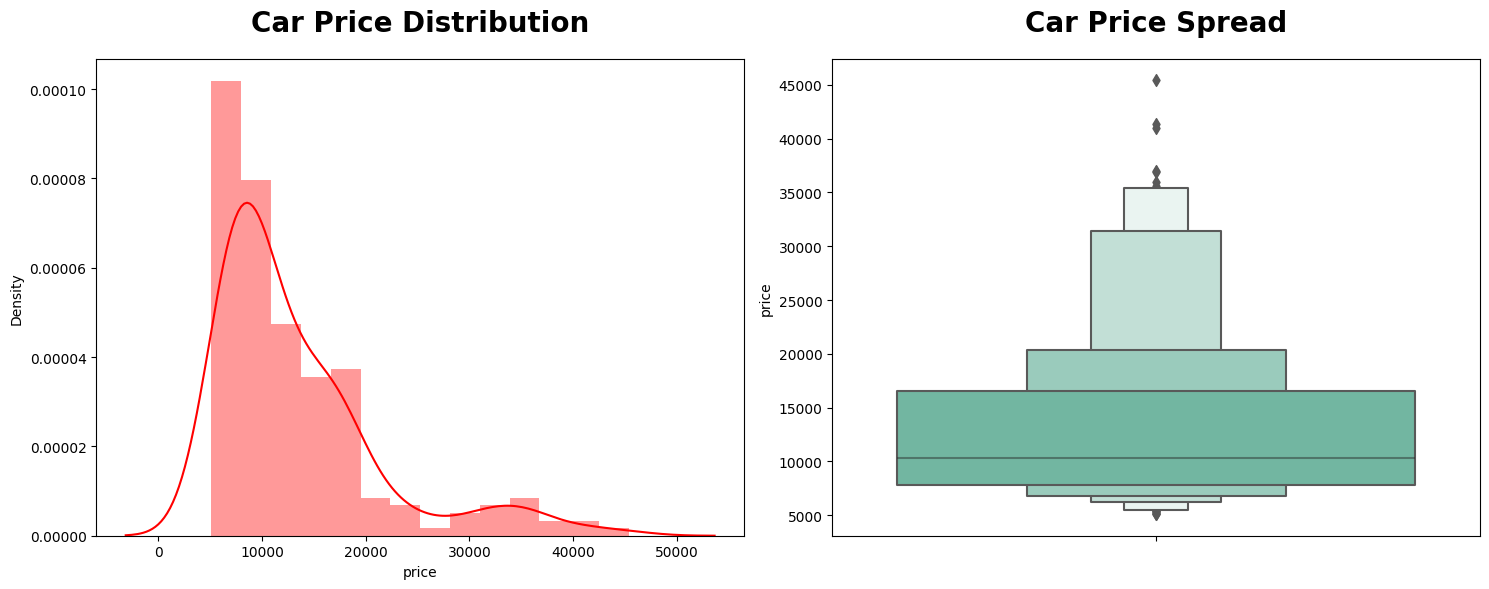

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxenplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [17]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
price,5118.0,13276.710571,10295.0,45400.0,7988.852332,1.777678


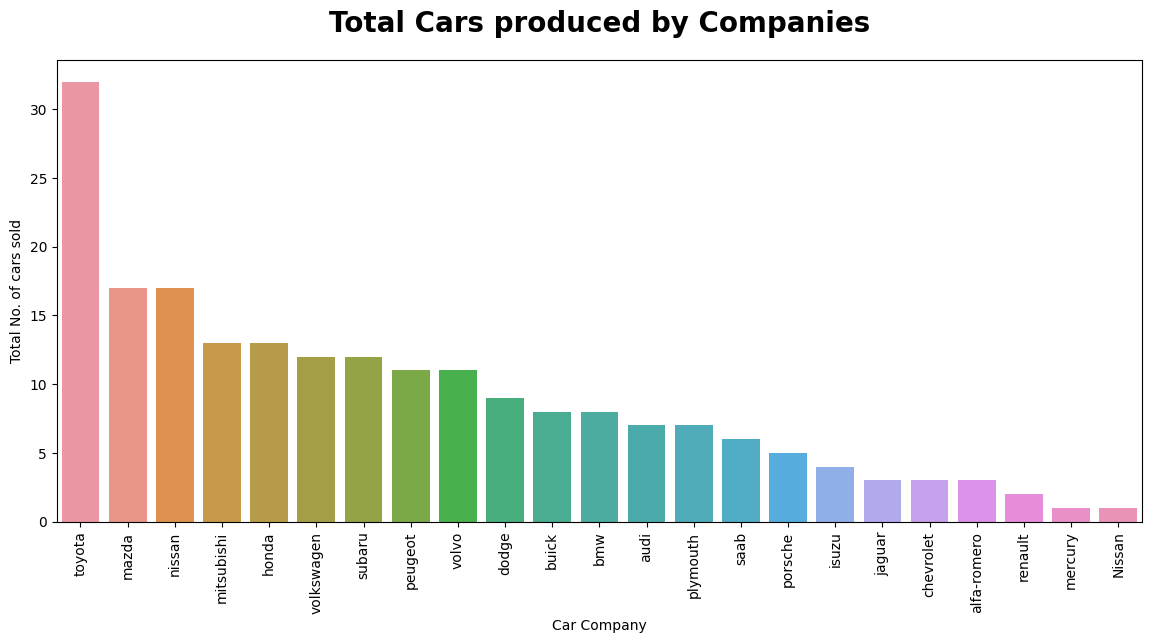

In [18]:
plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

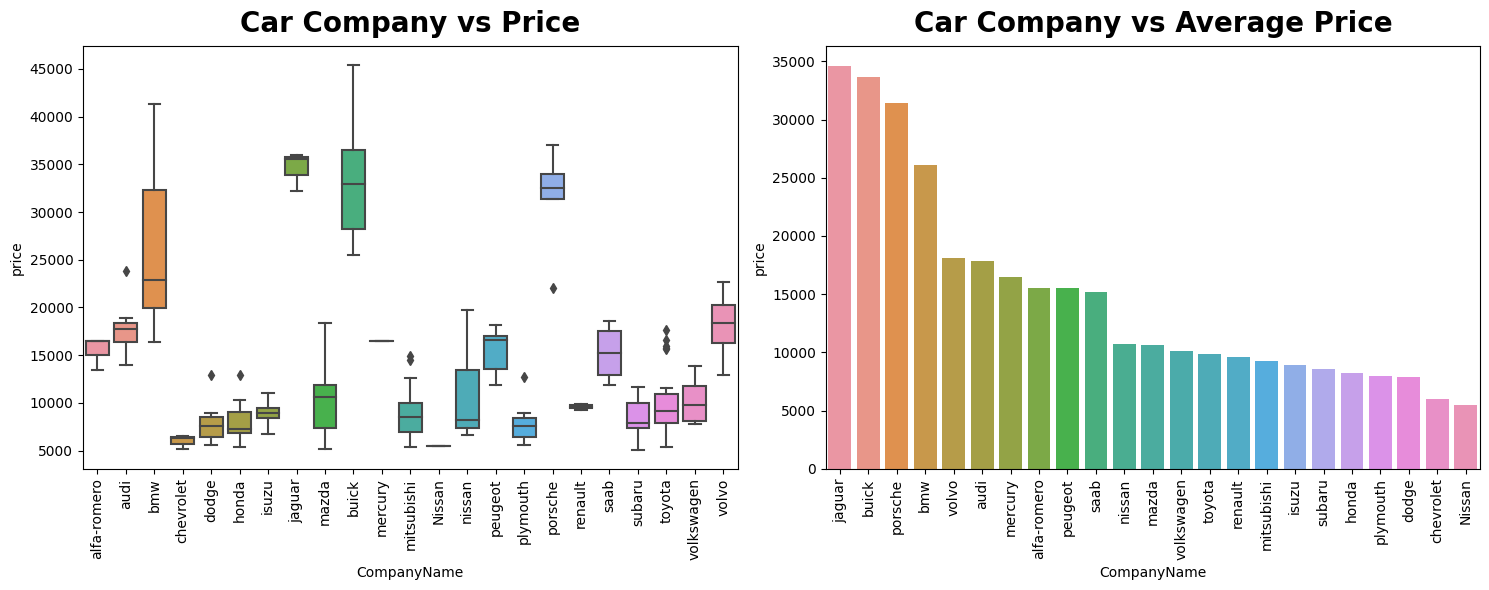

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

In [20]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="husl",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxenplot(x=cols,y="price",data=df,palette="husl")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="husl")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


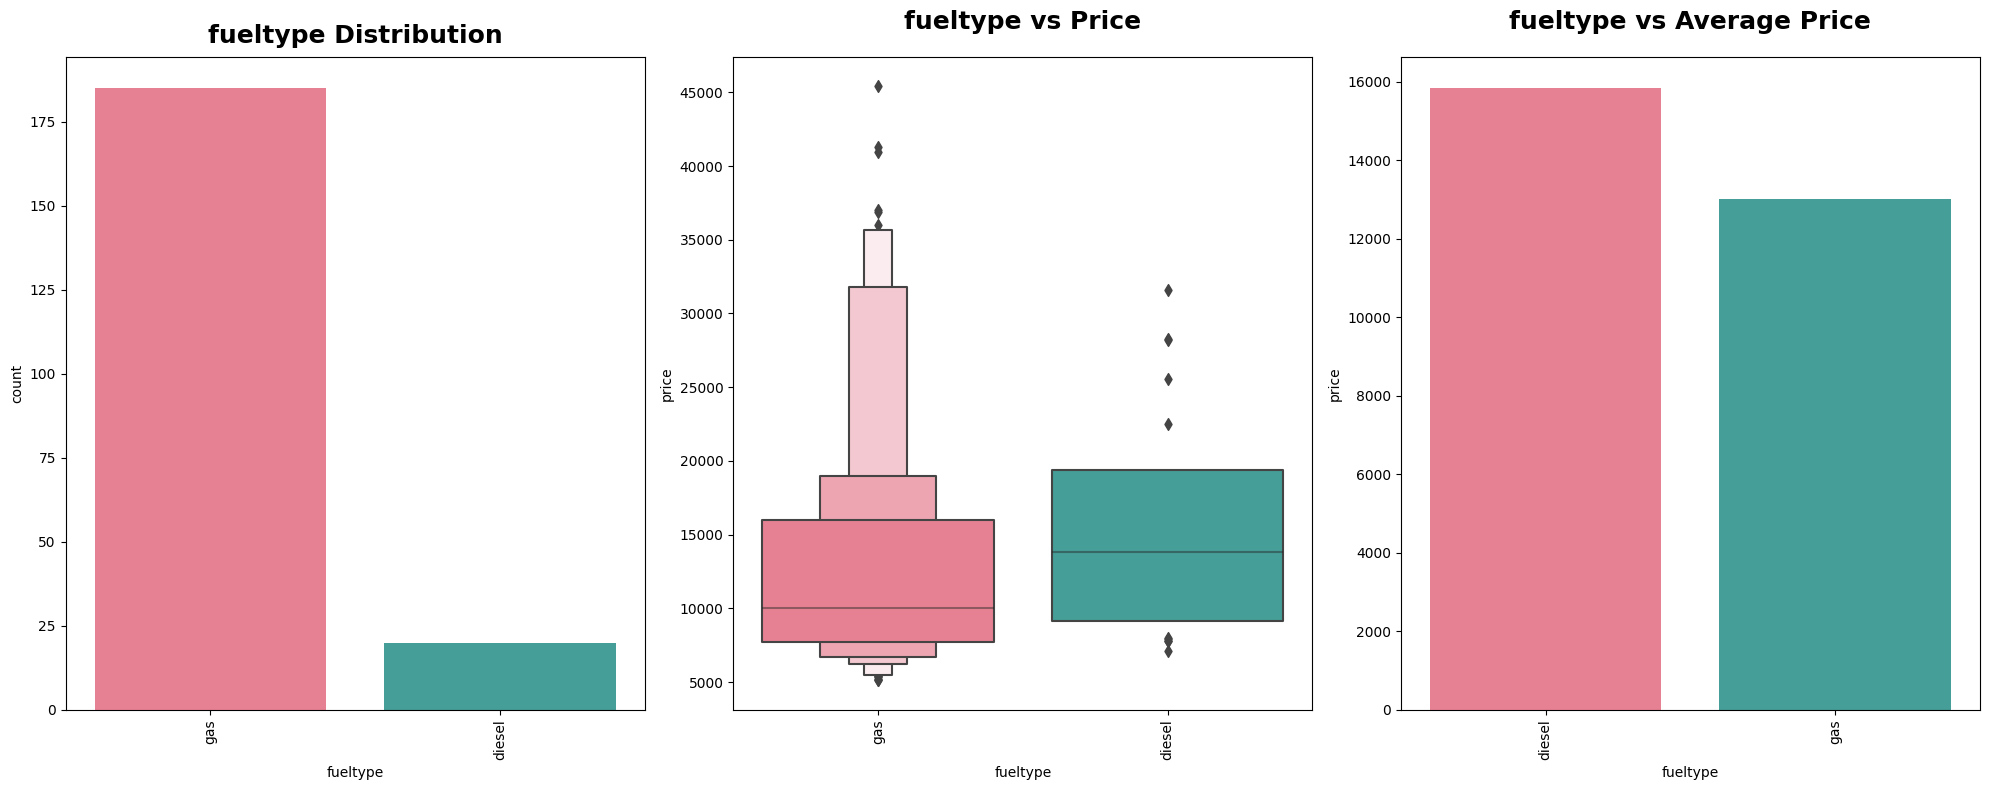

In [21]:
categorical_visualization("fueltype")

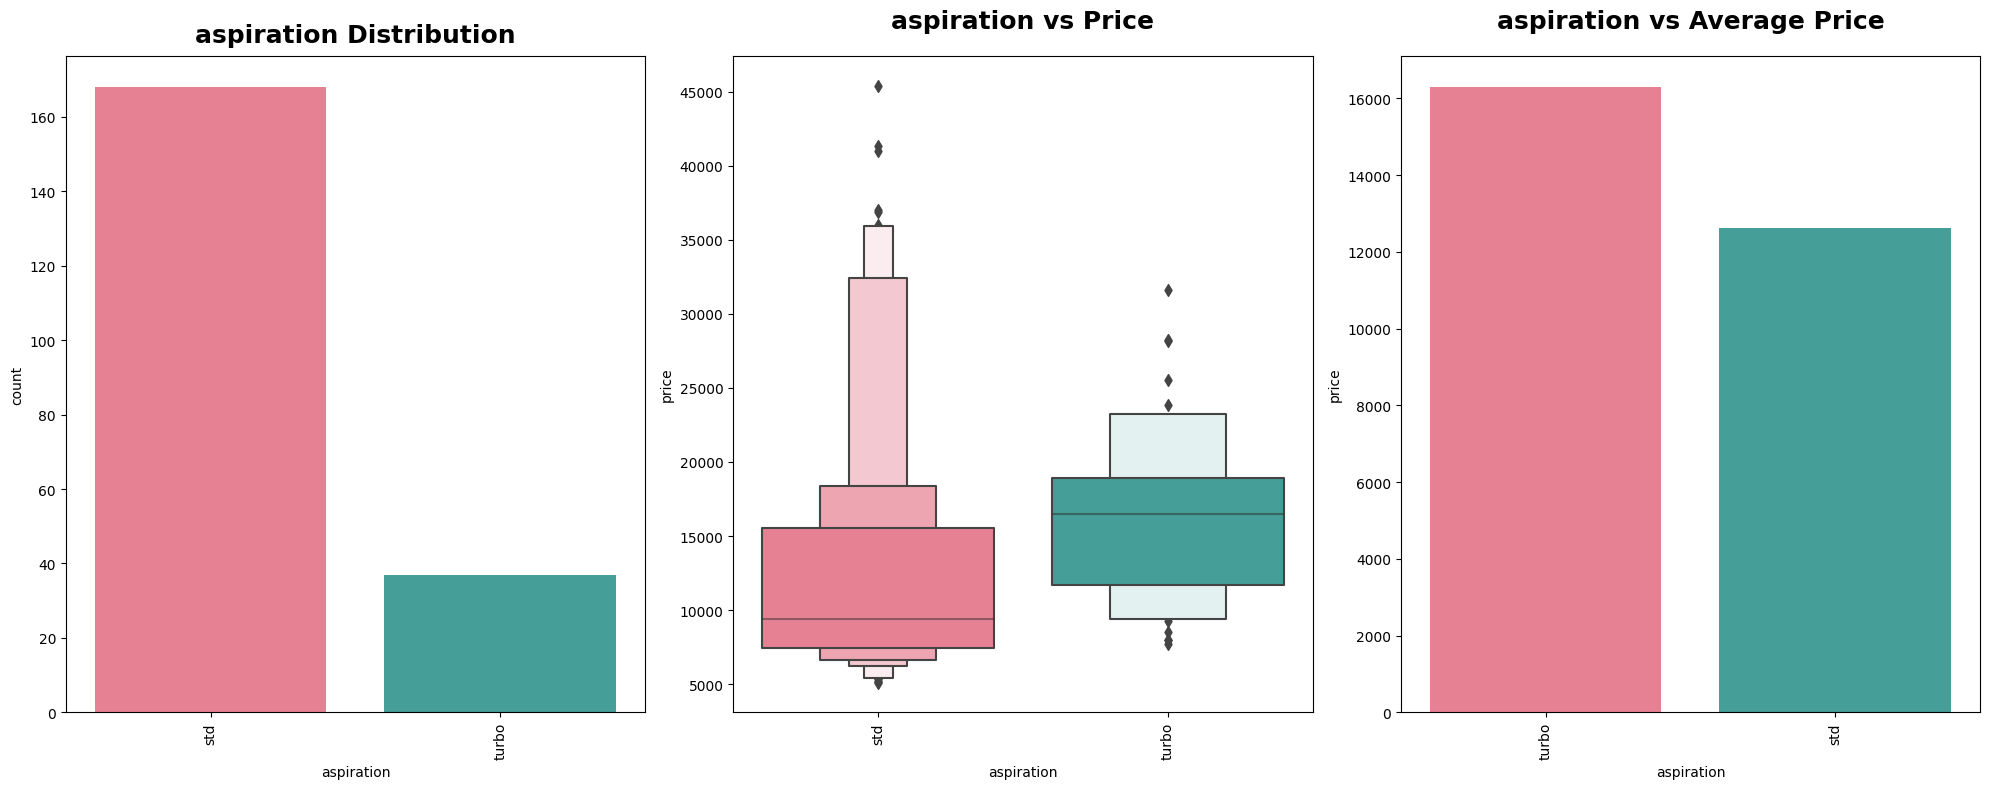

In [22]:
categorical_visualization("aspiration")

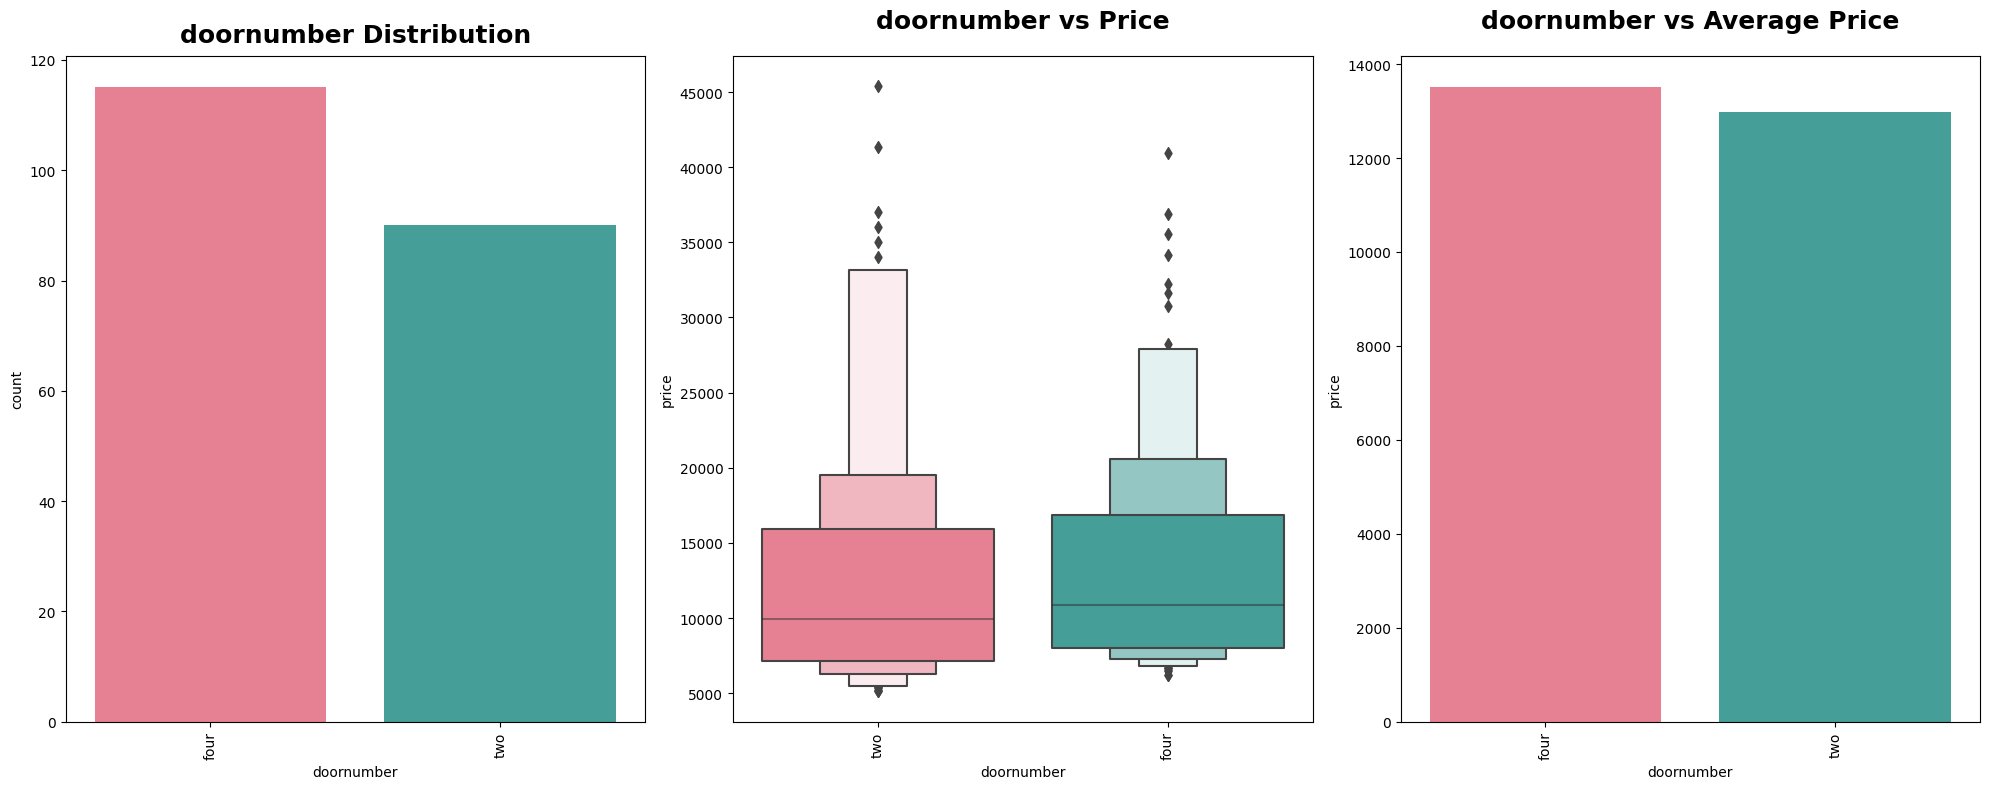

In [23]:
categorical_visualization("doornumber")

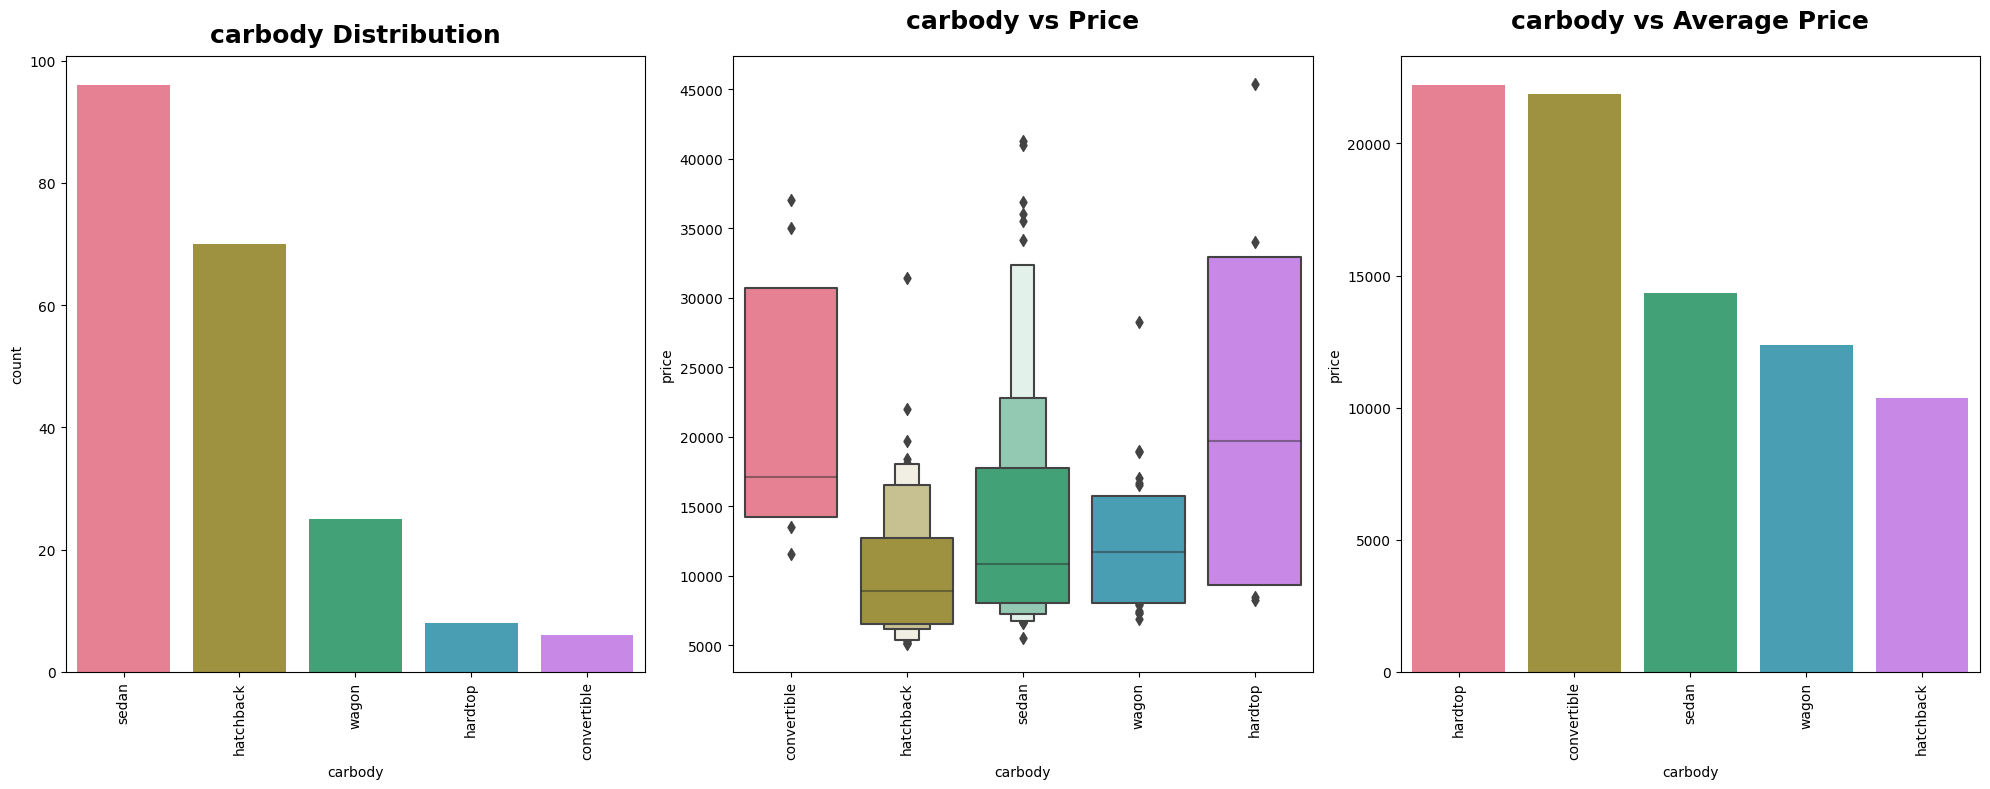

In [24]:
categorical_visualization("carbody")

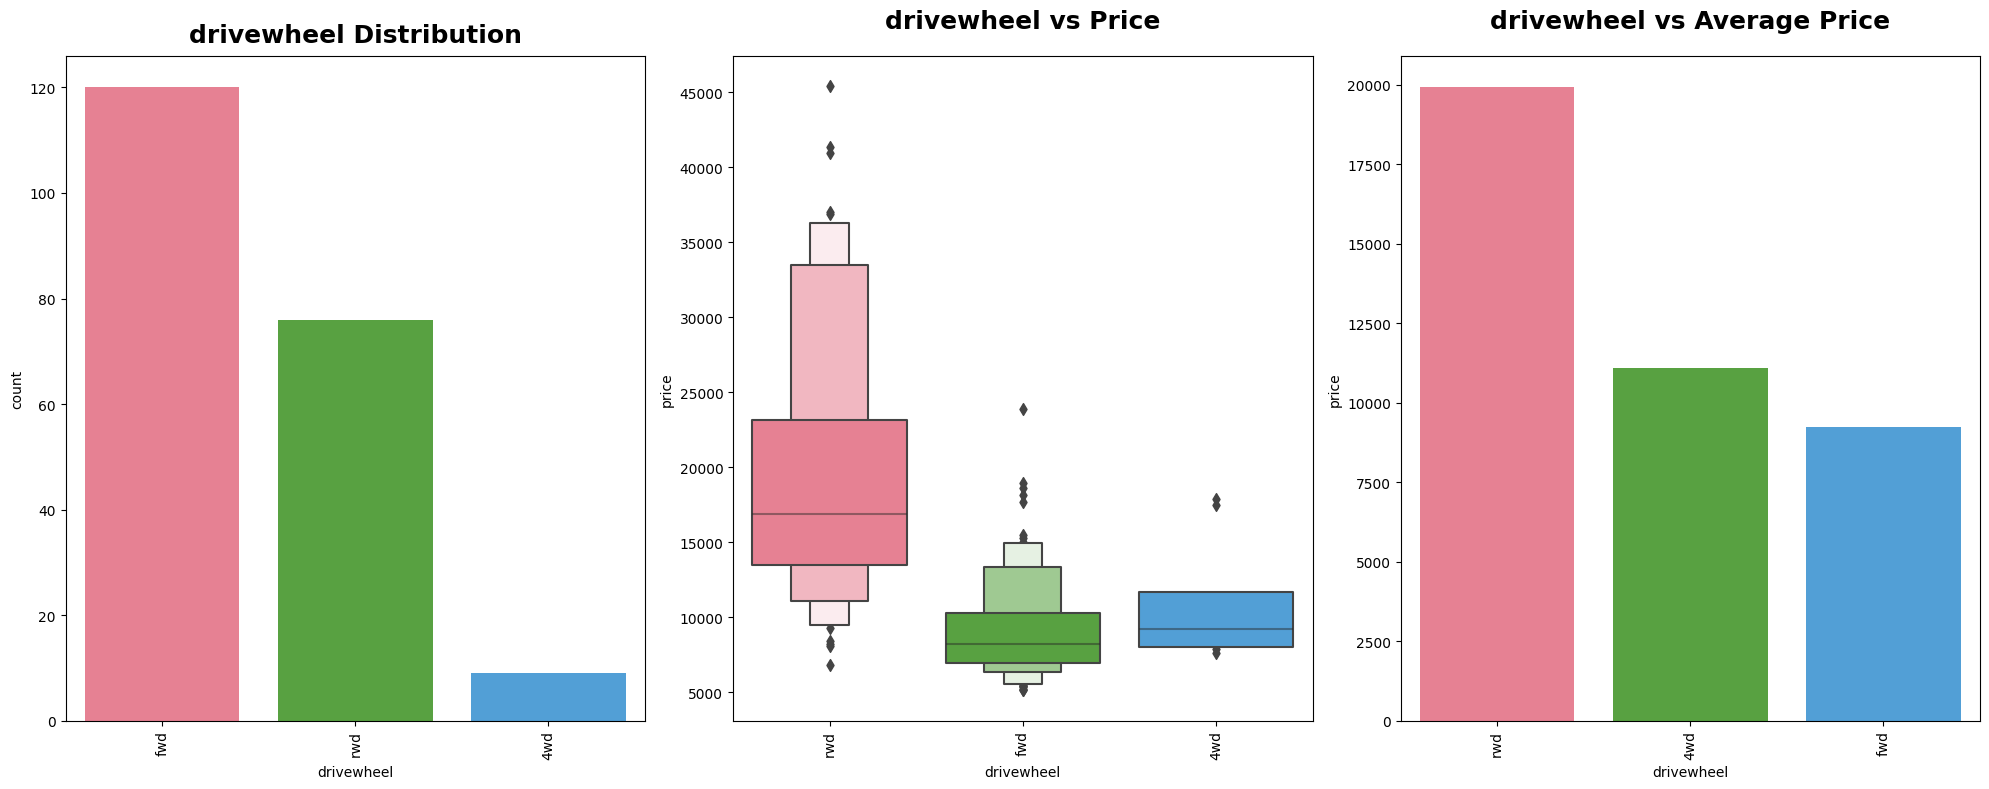

In [25]:
categorical_visualization("drivewheel")

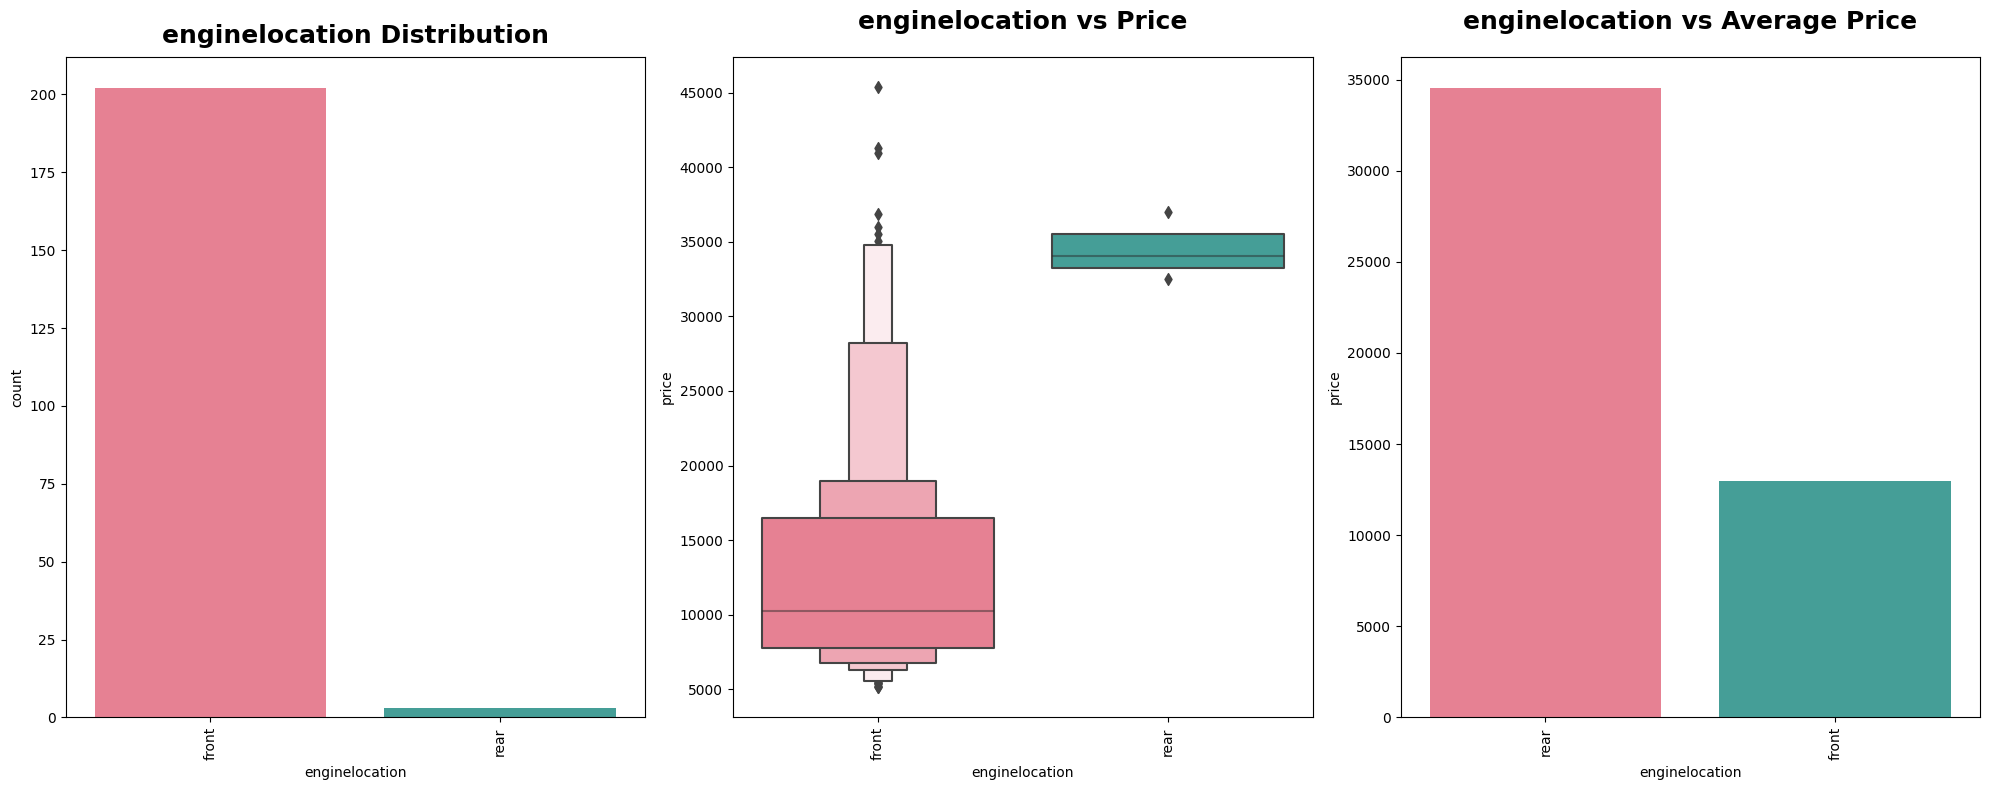

In [26]:
categorical_visualization("enginelocation")

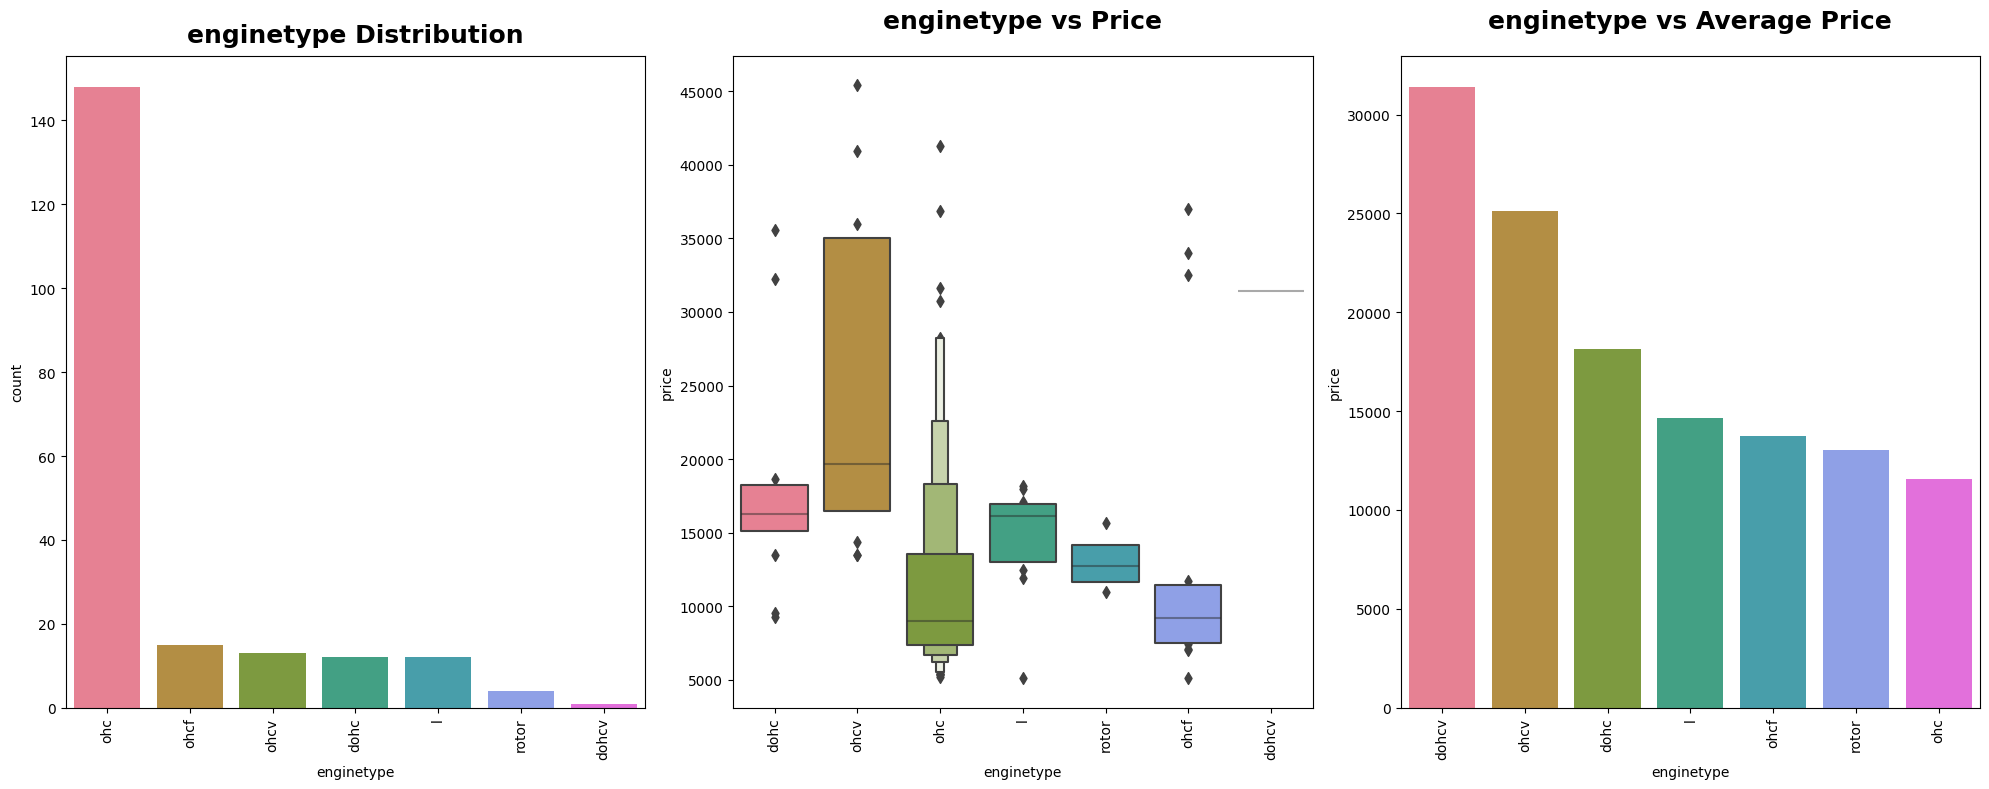

In [27]:
categorical_visualization("enginetype")

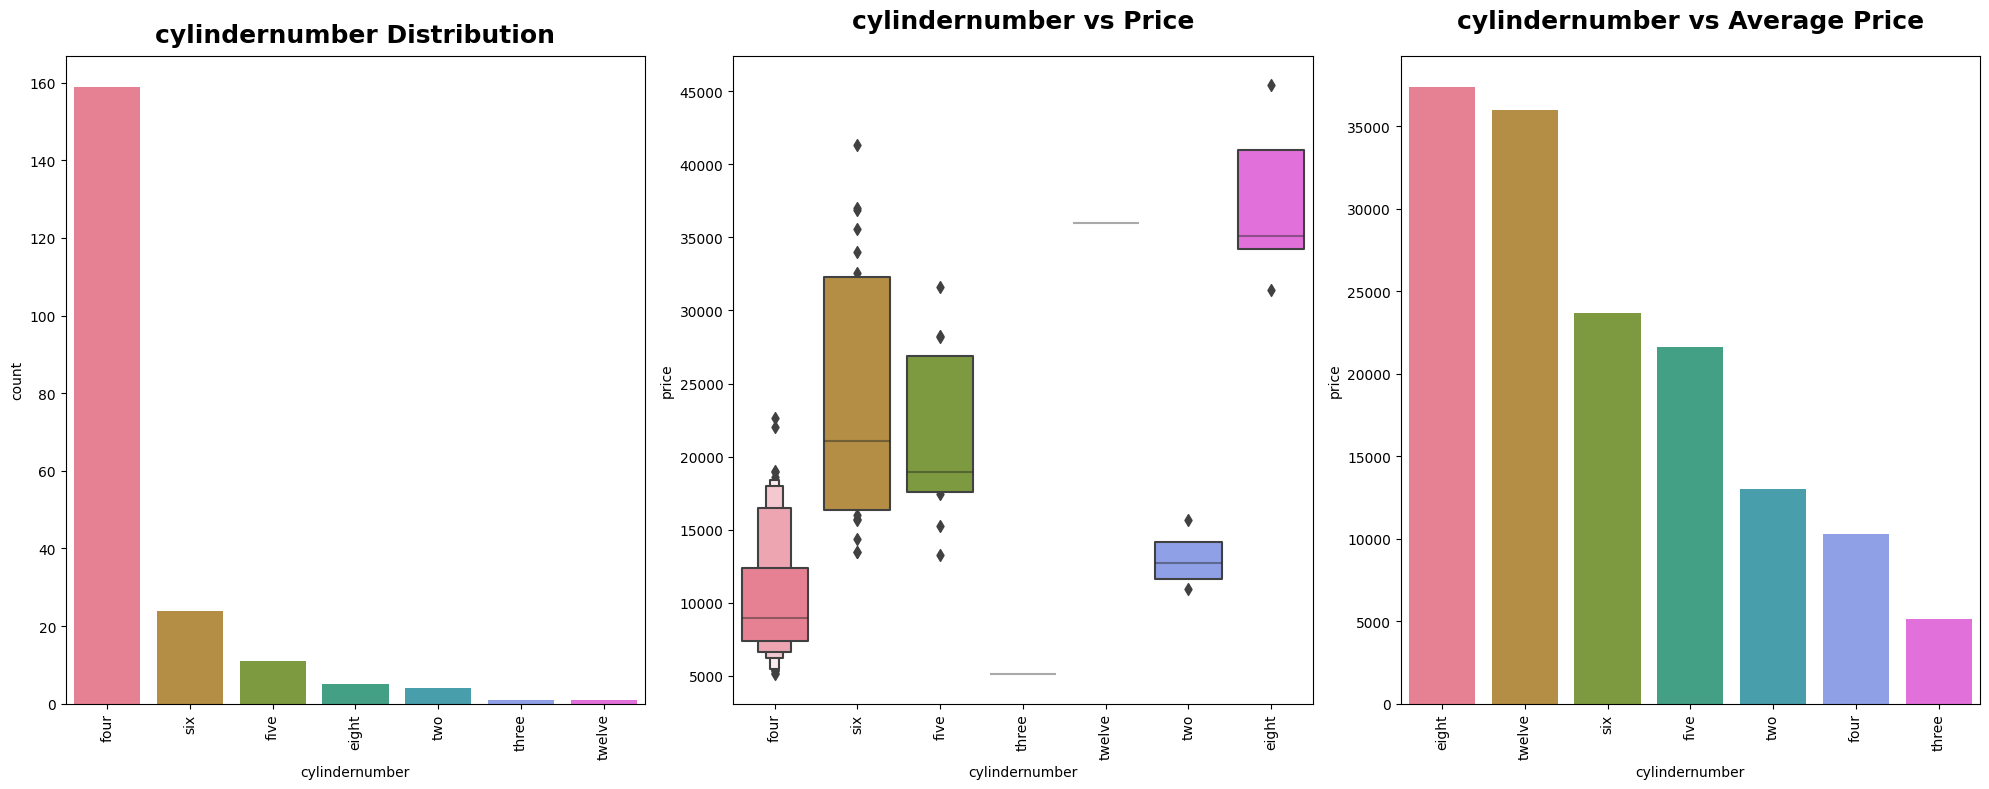

In [28]:
categorical_visualization("cylindernumber")

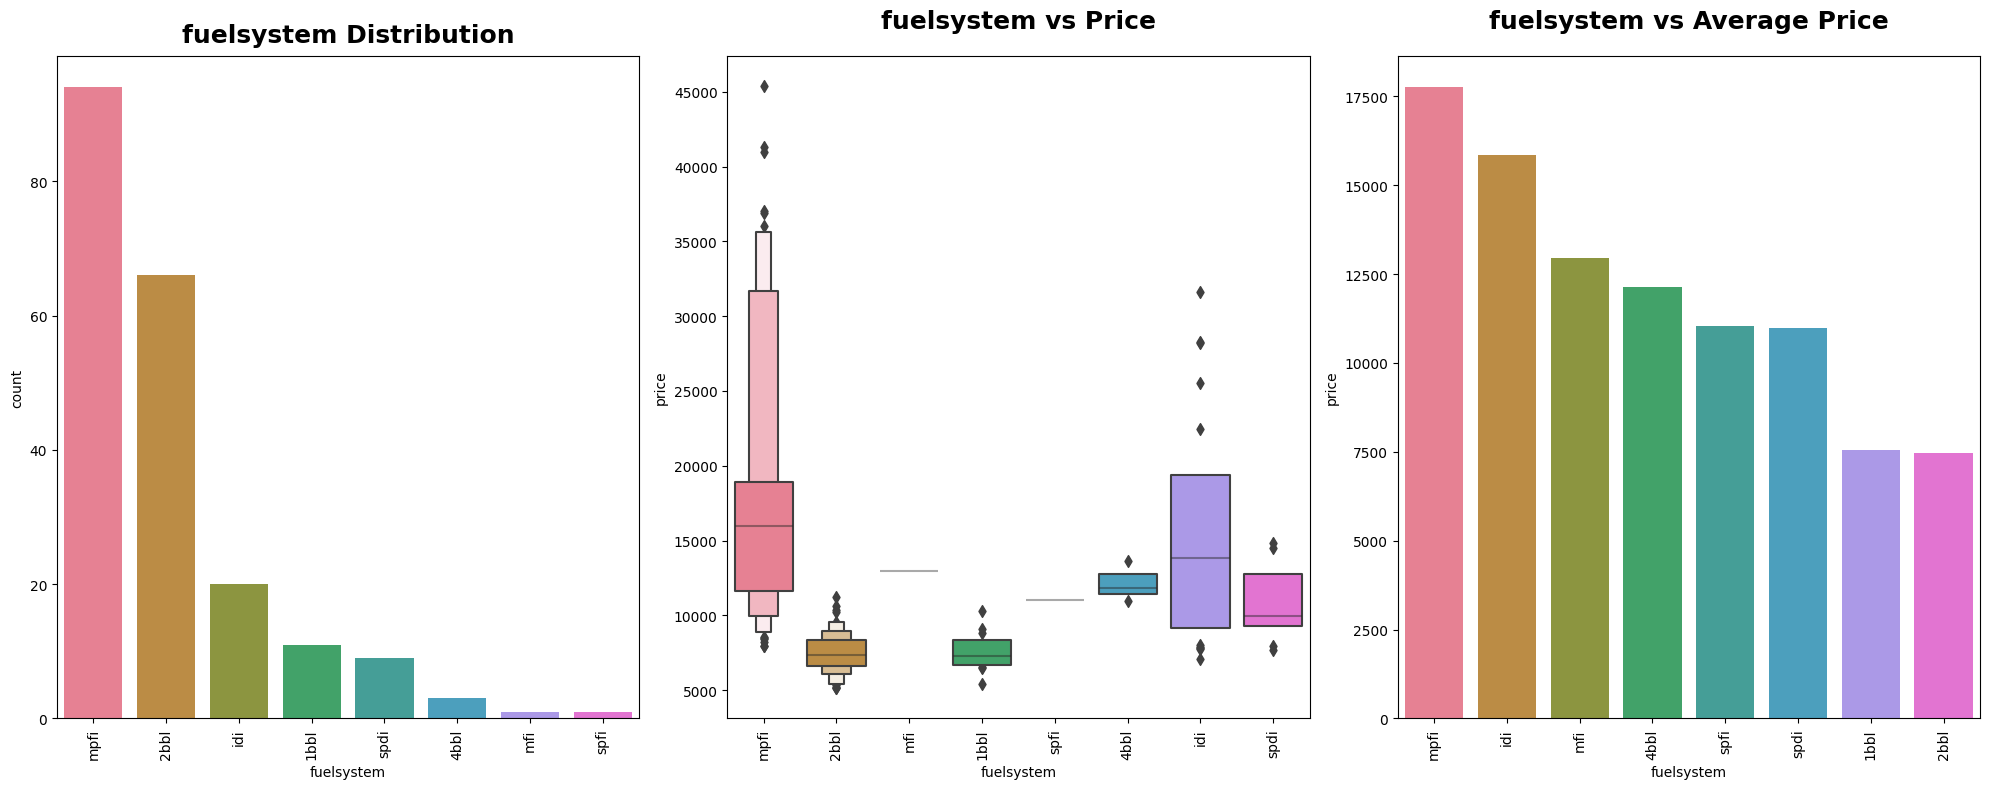

In [29]:
categorical_visualization("fuelsystem")

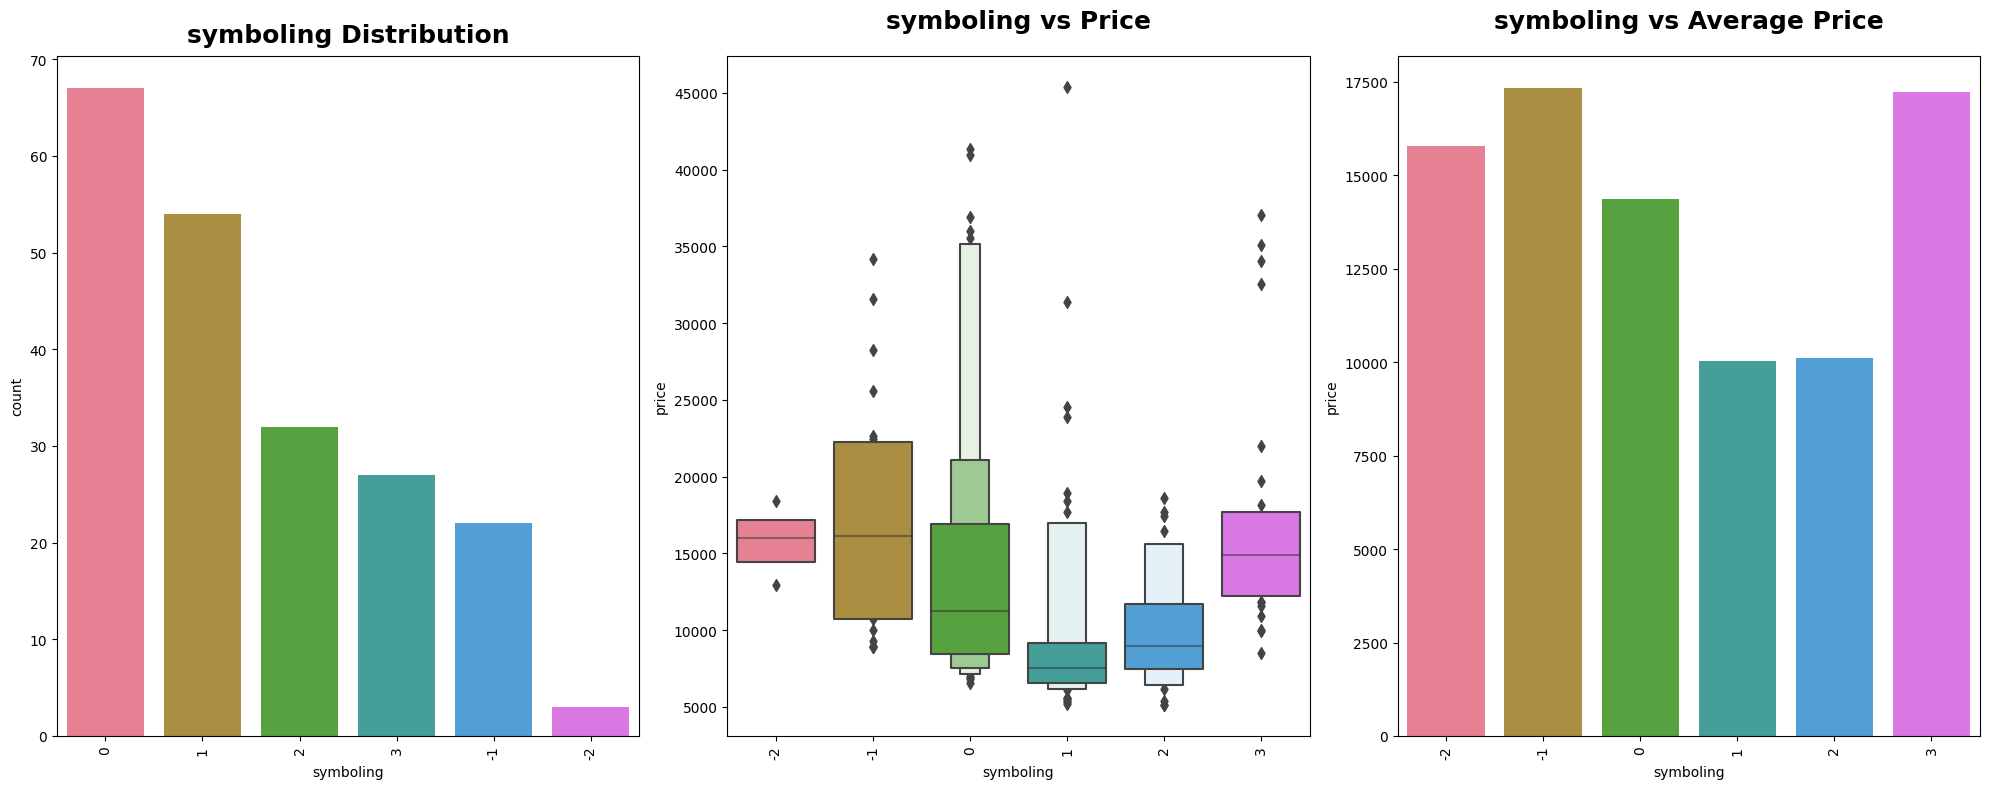

In [30]:
categorical_visualization("symboling")

In [31]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,palette='husl', hue='price')
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

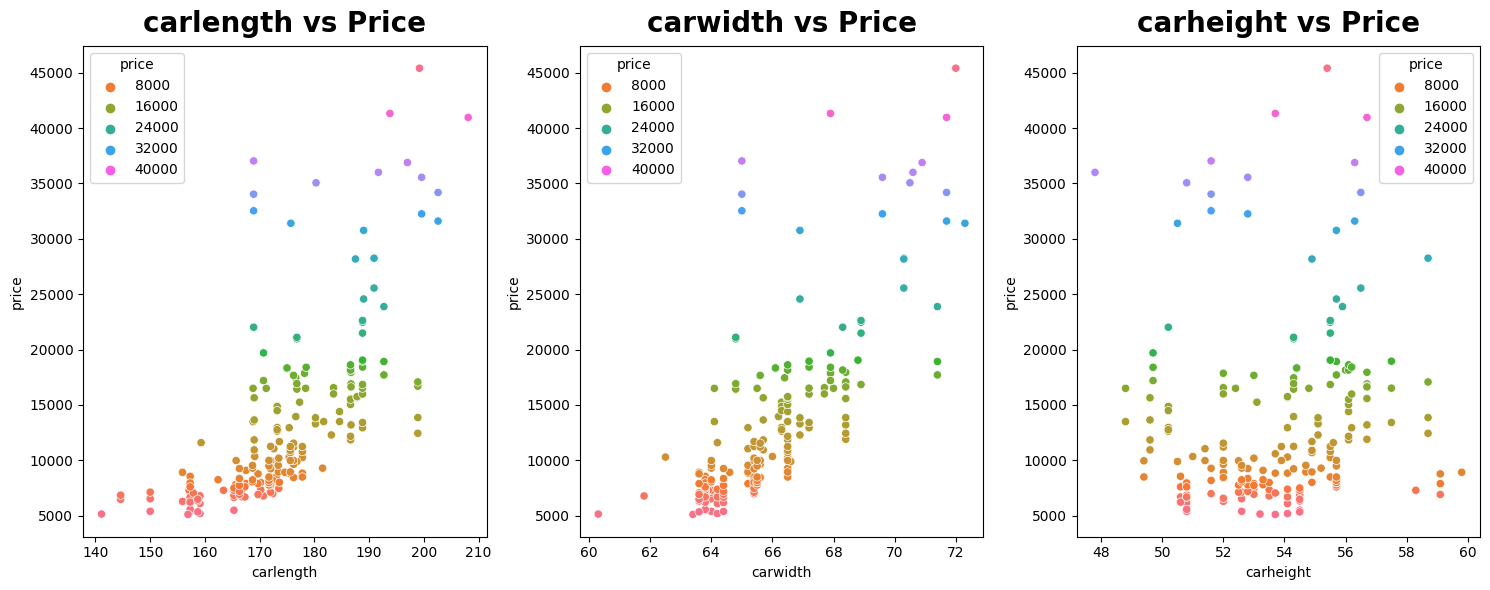

In [32]:
scatter_plot(["carlength","carwidth","carheight"])

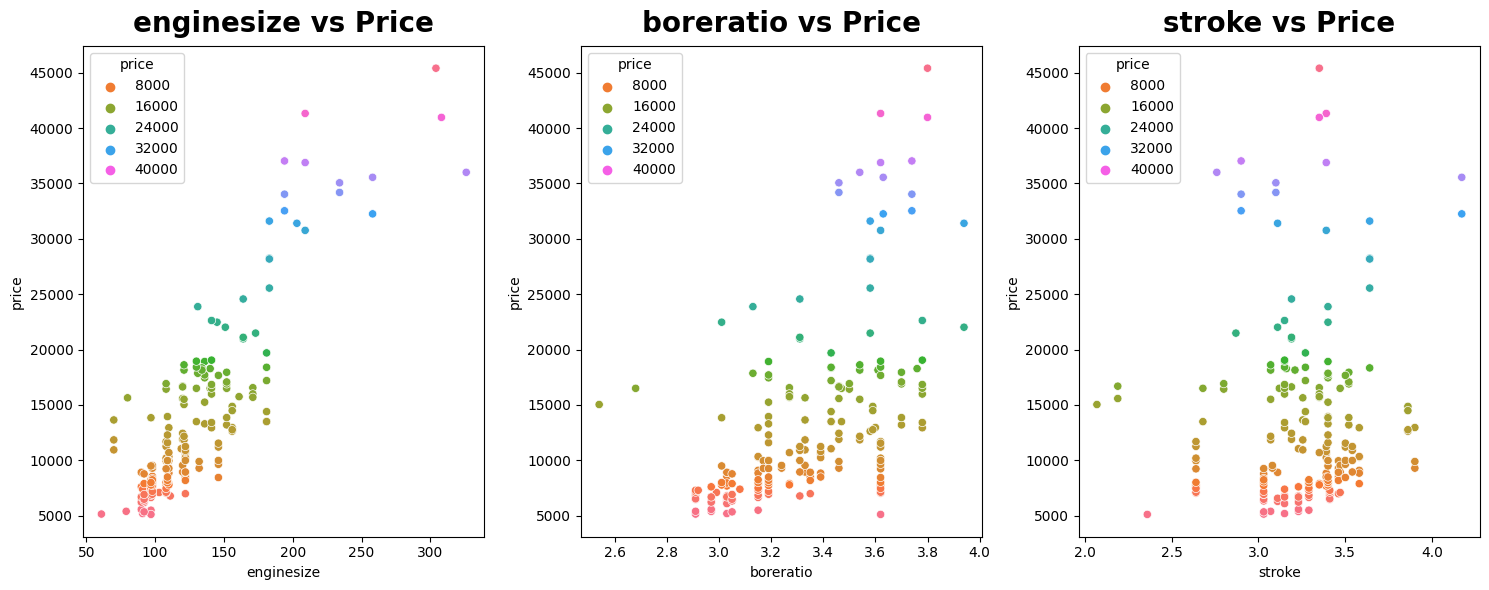

In [33]:
scatter_plot(["enginesize","boreratio","stroke"])

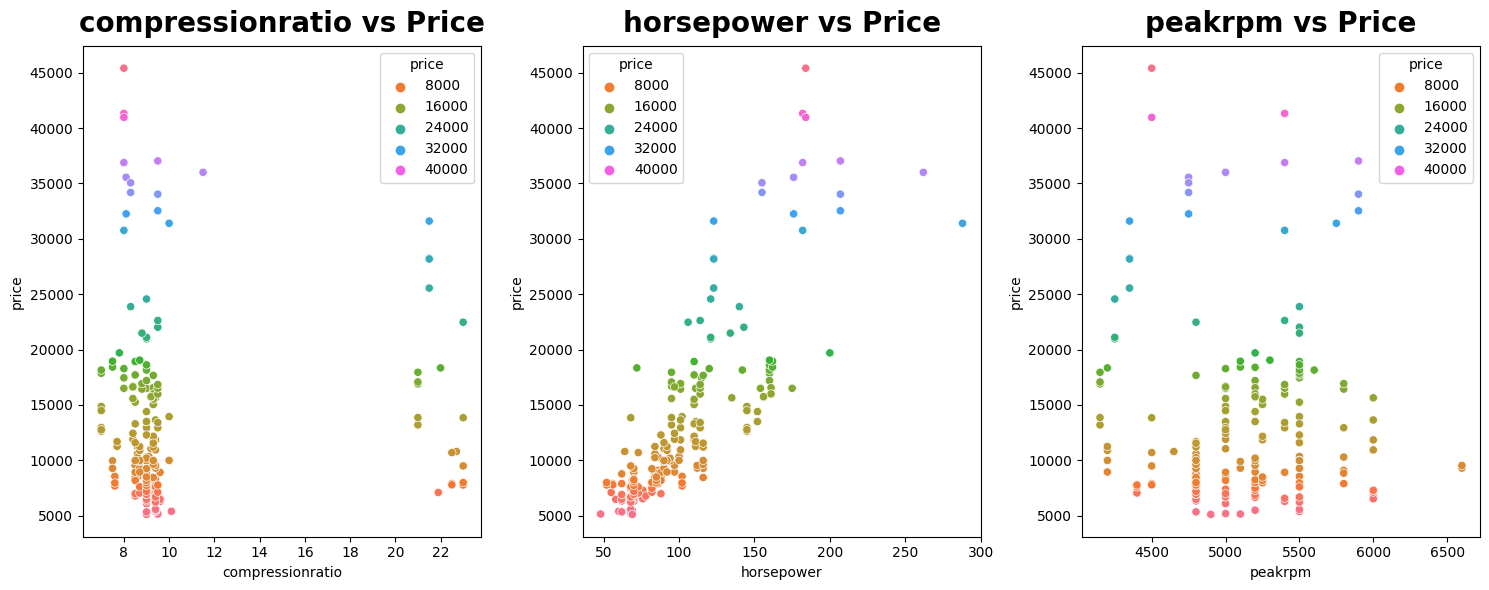

In [34]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

In [35]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,palette='husl', hue='price')
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

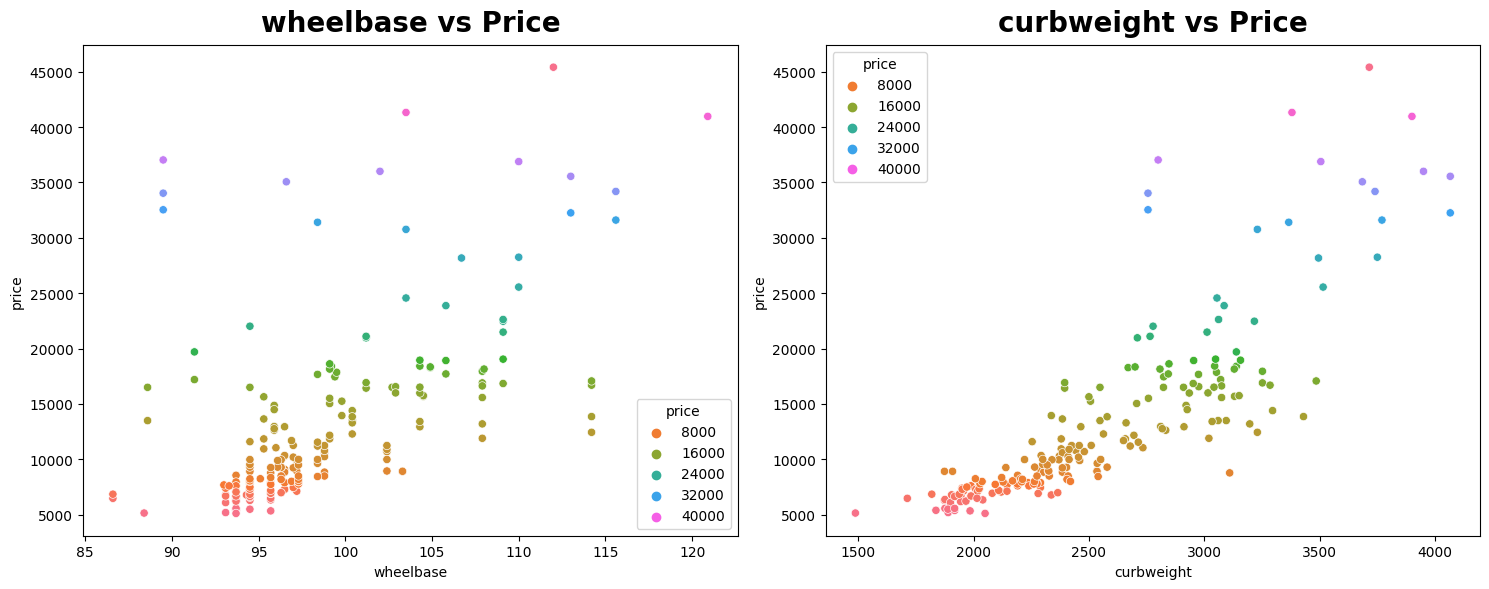

In [36]:
scatter_plot(["wheelbase","curbweight"])

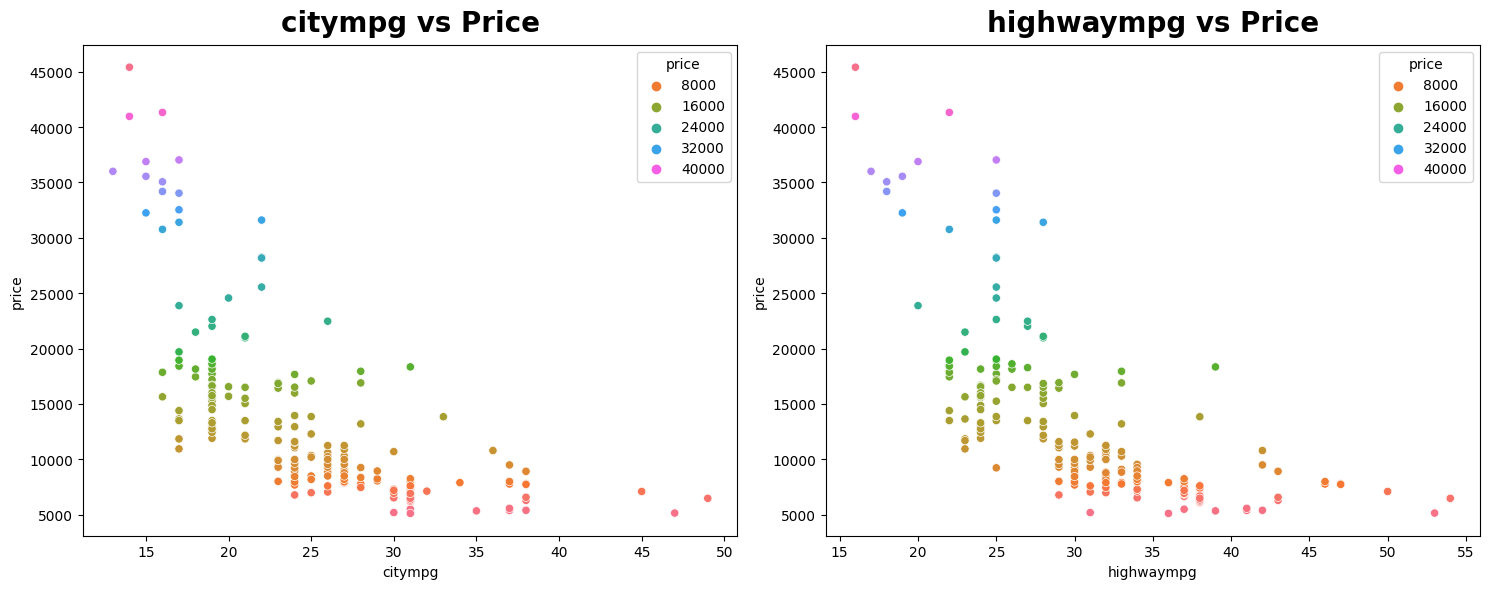

In [37]:
scatter_plot(["citympg","highwaympg"])

In [38]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2)
z

,mean
CompanyName,
Nissan,5499.00
alfa-romero,15498.33
audi,17859.17
bmw,26118.75
buick,33647.00
chevrolet,6007.00
dodge,7875.44
honda,8184.69
isuzu,8916.50


In [39]:
df = df.merge(z,how="left",on="CompanyName")

In [40]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


In [65]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]
new_df.shape

In [42]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


In [43]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [44]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,False,False,False,False,True,False,False,False,True,False
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,False,False,False,False,True,False,False,False,True,False
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,False,False,False,False,True,False,False,False,True,False
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,False,False,False,False,True,False,False,False,True,False
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,False,False,False,False,True,False,False,False,True,False


In [45]:
scaler = StandardScaler()

In [46]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [47]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,...,False,False,False,False,True,False,False,False,True,False
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,...,False,False,False,False,True,False,False,False,True,False
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,...,False,False,False,False,True,False,False,False,True,False
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,...,False,False,False,False,True,False,False,False,True,False
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,...,False,False,False,False,True,False,False,False,True,False


In [48]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [49]:
x.shape

(205, 48)

In [50]:
y.shape

(205,)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 48)
x_test - >   (41, 48)
y_train - >   (164,)
y_test - >   (41,)


In [52]:
training_score = []
testing_score = []
model_list=[]
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    model_list.append(model)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [53]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 96.0384799952984
r2_Score of LinearRegression() model on Testing Data is: 88.4054086081392


In [54]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 91.34649687341833


In [55]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.72482718759
r2_Score of RandomForestRegressor() model on Testing Data is: 94.8089777481702


In [56]:
model_prediction(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [57]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.86532176885409
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [58]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x00000197B272B8E0> model on Training Data is: 99.7086556035143
r2_Score of <catboost.core.CatBoostRegressor object at 0x00000197B272B8E0> model on Testing Data is: 94.01252203857477


In [59]:
models = ["LinearRegression","DecisionTree","RandomForest","LGBM","XGBoost","CatBoost"]

In [60]:
model_df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [61]:
model_df

,Algorithms,Training Score,Testing Score
0,LinearRegression,96.038480,88.405409
1,DecisionTree,99.865371,91.346497
2,RandomForest,98.724827,94.808978
3,LGBM,96.224248,88.739666
4,XGBoost,99.865322,92.664564
5,CatBoost,99.708656,94.012522


### Plotting above results using column-bar chart.

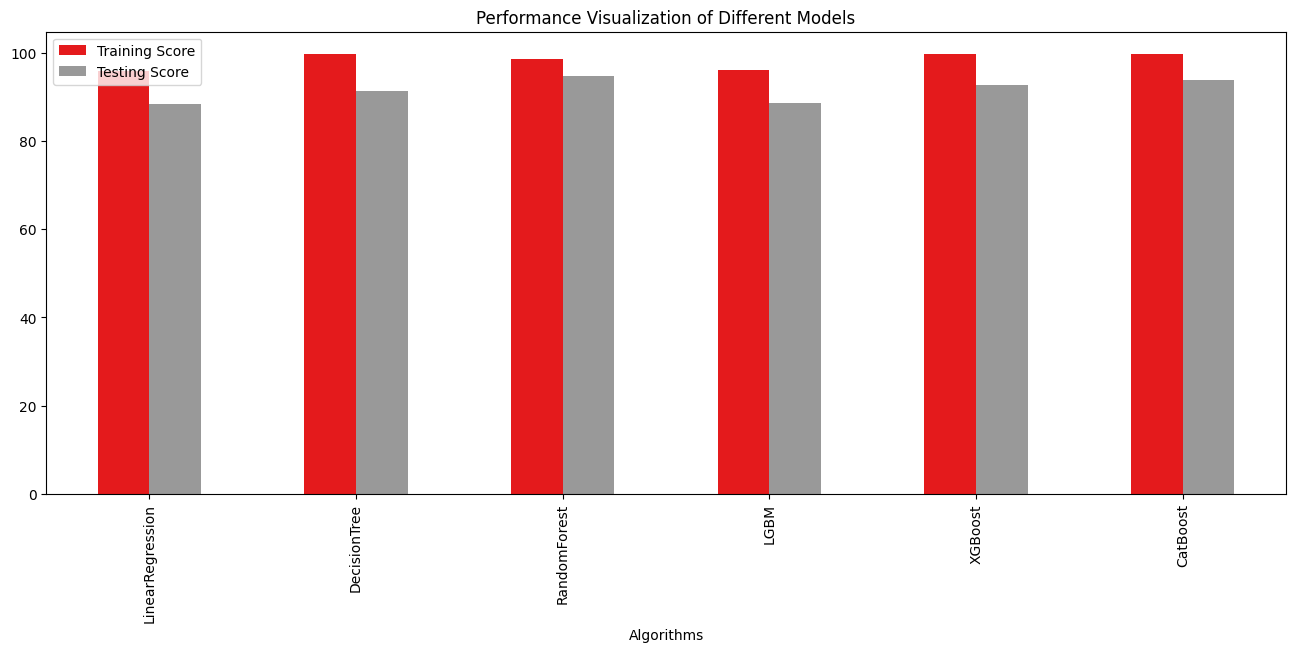

In [62]:
model_df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

In [63]:
import pickle
# save the model to disk
for (model,m )in zip(model_list, models):
    pickle.dump(model, open(m+'.pkl', 'wb'))